In [1]:
import numpy as np
import pandas as pd
#import pandas.util.testing as tm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc, accuracy_score

import pydotplus as pdp
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

##############

from sklearn.datasets import load_iris, load_digits, make_classification
from sklearn.ensemble import RandomForestClassifier

import re

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from matplotlib.colors import ListedColormap


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv('/content/titanic_train.csv')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
test = df
print(test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
test0 = test.replace({'Survived' : {1 : -1}})
print(test0['Survived'])

In [ ]:
#MALE = test['Sex'][0]
#FEMALE = test['Sex'][1]

test1 = test.replace({'Sex' : {'male' : 0}})
test1 = test1.replace({'Sex' : {'female' : 1}})

print(test1['Sex'])

In [ ]:
print(type(test['Sex'][0]))
print(type(test['Sex'][1]))

In [ ]:
for i in range(0, 891, 1):
  if test['Pclass'][i] == 1 && test['Sex'][i] == 'male':
    test.['Pclass_Sex'][i] = 1
  elif test['Pclass'][i] == 1 && test['Sex'][i] == 'female':
    test.['Pclass_Sex'][i] = 2
  elif test['Pclass'][i] == 2 && test['Sex'][i] == 'male':
    test.['Pclass_Sex'][i] = 3
  elif test['Pclass'][i] == 2 && test['Sex'][i] == 'female':
    test.['Pclass_Sex'][i] = 4
  elif test['Pclass'][i] == 3 && test['Sex'][i] == 'male':
    test.['Pclass_Sex'][i] = 5
  elif test['Pclass'][i] == 3 && test['Sex'][i] == 'female':
    test.['Pclass_Sex'][i] = 6

print(test)


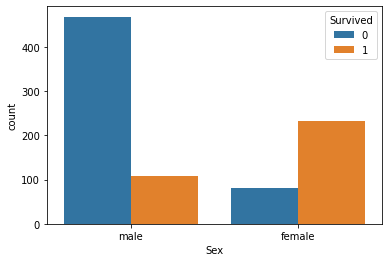

In [3]:
sns.countplot('Sex',hue='Survived',data=df)

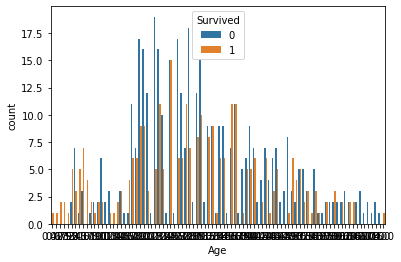

In [4]:
sns.countplot('Age',hue='Survived',data=df)

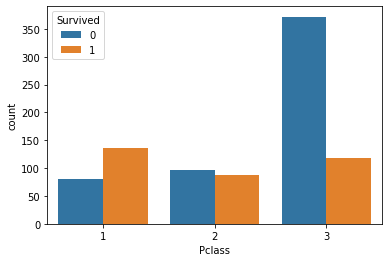

In [5]:
sns.countplot('Pclass',hue='Survived',data=df)

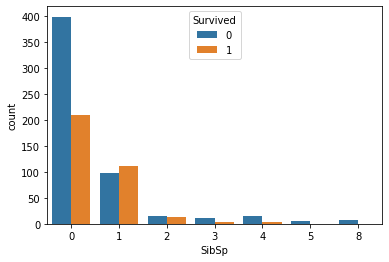

In [9]:
sns.countplot('SibSp',hue='Survived',data=df)

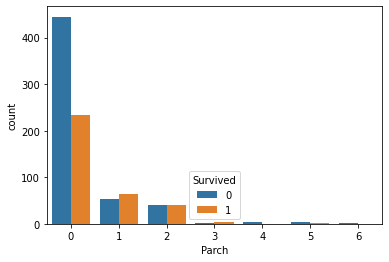

In [10]:
sns.countplot('Parch',hue='Survived',data=df)

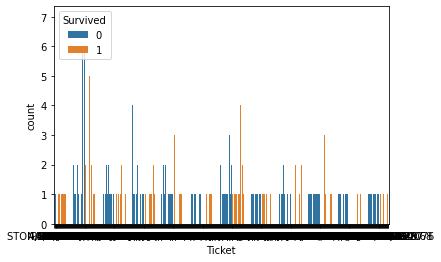

In [11]:
sns.countplot('Ticket',hue='Survived',data=df)

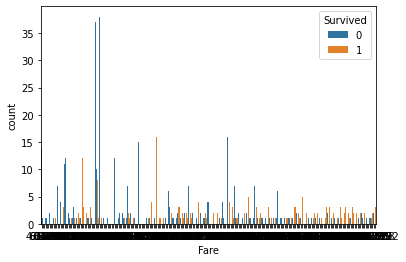

In [12]:
sns.countplot('Fare',hue='Survived',data=df)

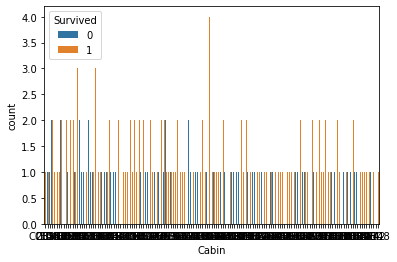

In [13]:
sns.countplot('Cabin',hue='Survived',data=df)

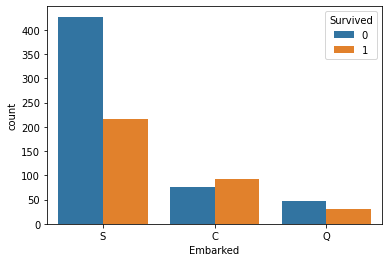

In [14]:
sns.countplot('Embarked',hue='Survived',data=df)

In [20]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

df2 = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)



train_X = df2.drop('Survived', axis=1)
train_y = df2.Survived

(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [21]:
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.6380597014925373

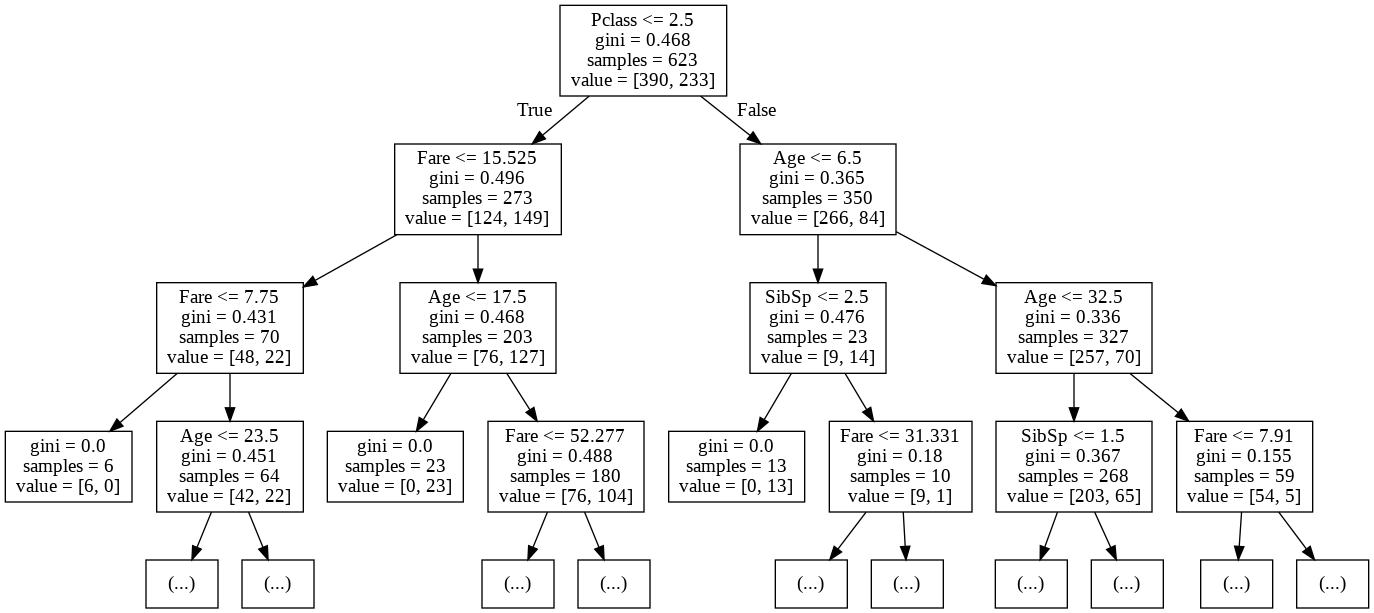

In [22]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

In [25]:
iris = load_iris()
df3 = pd.DataFrame(iris.data, columns=iris.feature_names)

df3['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

features = df3.columns[:4]
label = df3["species"]

df_train, df_test, label_train, label_test = train_test_split(df3[features], label)
clf2 = RandomForestClassifier(n_estimators=150)
clf2.fit(df_train, label_train)
print("予測の精度")
print(clf2.score(df_test, label_test))

予測の精度
0.9210526315789473


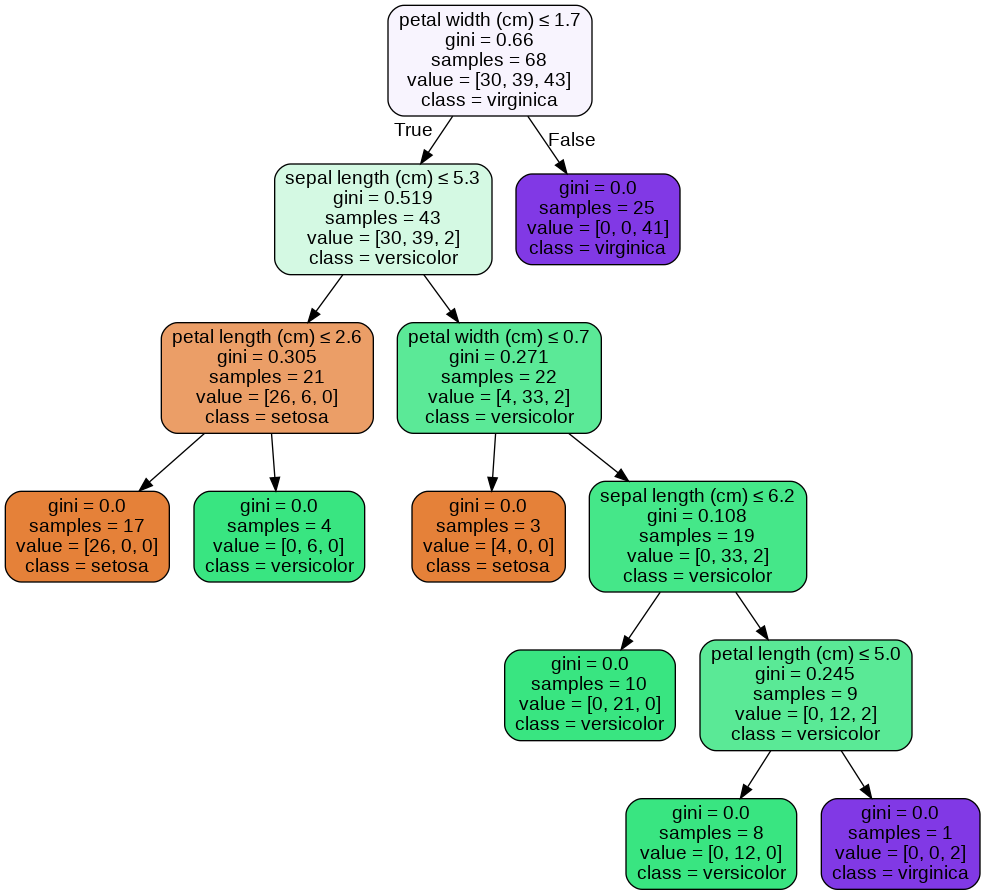

In [28]:
estimators = clf2.estimators_
file_name = "/content/tree_visualization.png"
dot_data = tree.export_graphviz(estimators[0],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=features,
                                class_names=iris.target_names,
                                special_characters=True)
graph = pdp.graph_from_dot_data(dot_data)
graph.write_png(file_name)
Image(graph.create_png())